Antoni Pawłowicz 191733

<div align="center">
<em>
METODY INTERAKCJI CZŁOWIEK MASZYNA</br></br>
Laboratoria 6</br>
Projekt Interakcji z wykorzystaniem gestów statycznych
</em>

# Zadanie 1
Zbuduj i uruchom program, przeanalizauj jego działanie na pliku
„A.mp4”

> [!NOTE]
> Dzień dobry, przepraszam za tak późne przesłanie zadania, zrobiłem je na innych labach żeby mieć dostęp do QT. W związku z moim kompletnym brakiem wiedzy dot. Cpp i QT niektóre zadania były inspirowane.

In [1]:
from IPython.display import Image, display

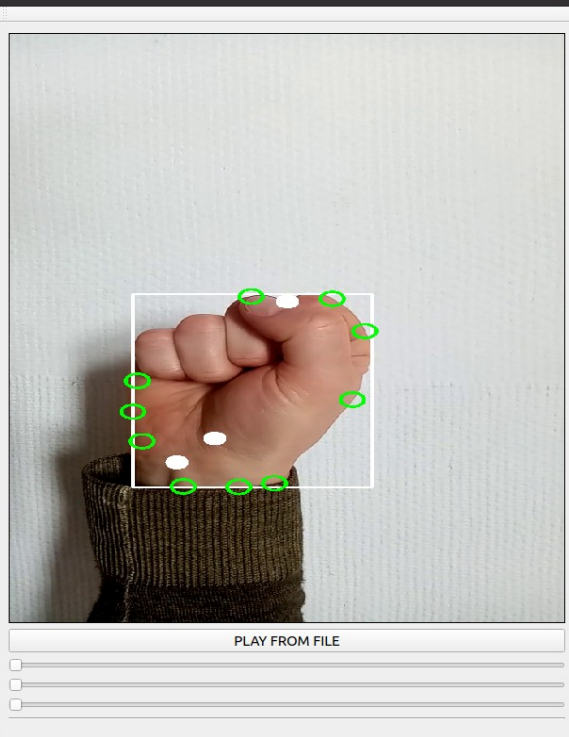

In [2]:
display(Image('./overview.png'))

Mamy jakieś suwaki i punkt które być może pokazują granice dłoni

# Zadanie 2
Zmodyfikuj program tak, żeby można było przekazywać zakres
minimalny wartości progowych dla funkcji:
skin_segmentation(input_img, skinMask, min_val, cv::Scalar(24, 255,
255))

Będę szczery nie mam pojęcia jak to zrobić w QT/cpp

# Zadanie 3
 Zmodyfikuj GUI programu tak, żeby dostępne były dodatkowe 3 slider
np. tak jak przedstawiono to na ilustracji.

In [ ]:
"""
Connection to signal slot
"""

void MainWindow::on_horizontalSlider_4_valueChanged(int value) // Slider to set Hmax
{
 hmax = value;
 hsvmax.val[0] = value;
 emit setScalarMax(hsvmax);
}


void MainWindow::on_horizontalSlider_5_valueChanged(int value) // Slider to set Smax
{
 smax = value;
 hsvmax.val[1] = value;
 emit setScalarMax(hsvmax);
}


void MainWindow::on_horizontalSlider_6_valueChanged(int value) // Slider to set Vmax
{
 vmax = value;
 hsvmax.val[2] = value;
 emit setScalarMax(hsvmax);
}

"""
przekazanie do VideoThread
"""
public slots:
    void getScalarMin(cv::Scalar s1);
    void getScalarMax(cv::Scalar s2);

void VideoThread::getScalarMax(cv::Scalar s2)
{
    max_val = s2;
    qDebug() << s2.val[0] << "val 0" << s2.val[1] << "val 1" << s2.val[2] << "val 2";
}



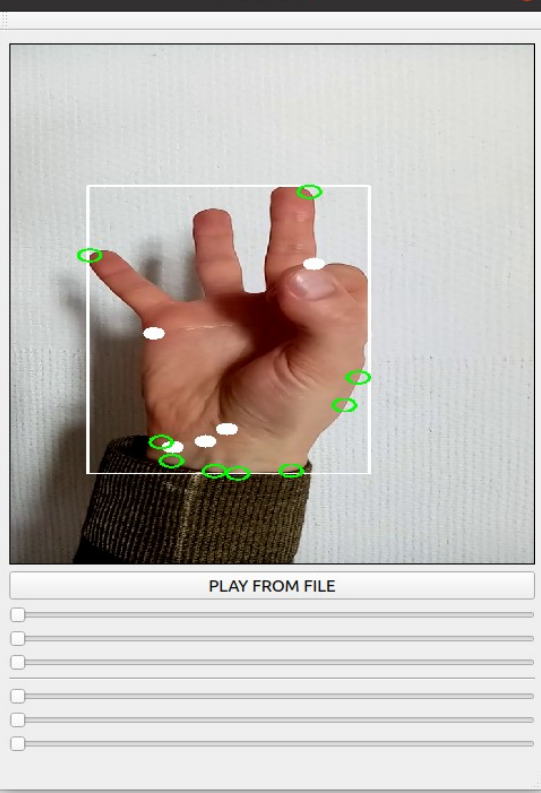

In [4]:
display(Image('./sliders.png'))

Mamy slidery i wyświetlamy jakieś wartości e.g.

1 "val 0" 2 "val 1" 3 "val 2"

# Zadanie 4
Napisz algorytm detekcji gestów dla dwóch dowolnych pozostałych
gestów (dwóch dowolnych pozostałych plików wideo z gestami)


In [ ]:
void VideoThread::gesture_detection(cv::Rect rect, 
                                    const std::vector<cv::Point>& hull_points,
                                    const std::vector<cv::Point>& def_points)
{
    std::vector<double> dist_hull;
    std::vector<double> dist_deff;

    double avg_dist_hull = 0.0;
    double avg_dist_deff = 0.0;
    int fingerCount = 0;

    // Calculate the center of the hand
    cv::Point hand_c(rect.x + rect.width / 2, rect.y + rect.height / 2);

    for (const auto& pt : hull_points) {
        double d = dist(hand_c, pt);
        dist_hull.push_back(d);
        avg_dist_hull += d;

        if (d > rect.width * 0.3) {
            fingerCount++;
        }
    }

    if (!dist_hull.empty()) {
        avg_dist_hull /= static_cast<double>(dist_hull.size());
    }

    for (const auto& pt : def_points) {
        double d = dist(hand_c, pt);
        dist_deff.push_back(d);
        avg_dist_deff += d;
    }

    if (!dist_deff.empty()) {
        avg_dist_deff /= static_cast<double>(dist_deff.size());
    }

    // one finger up classification
    if (fingerCount == 25) {
        qDebug() << "FINGER UP";
    } // it has to be OK
    else if (fingerCount <= 30) {
        qDebug() << " OK";
    }
}


Na podstawie sumy punktów możemu klasyfikować jakiś gest jako palec w górze albo ok

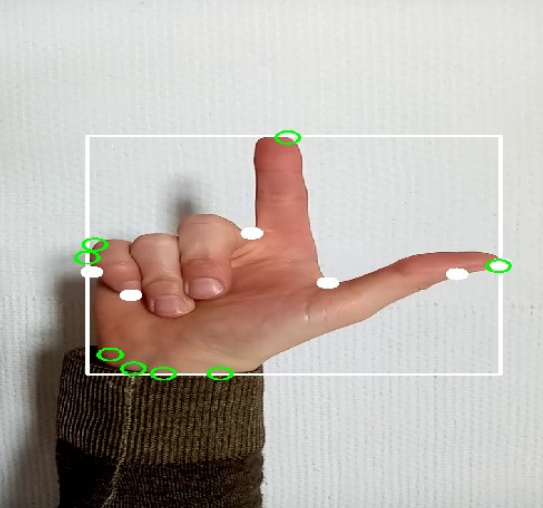

In [7]:
display(Image('./pointing.png'))

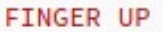

In [5]:
display(Image('./oneup.png'))

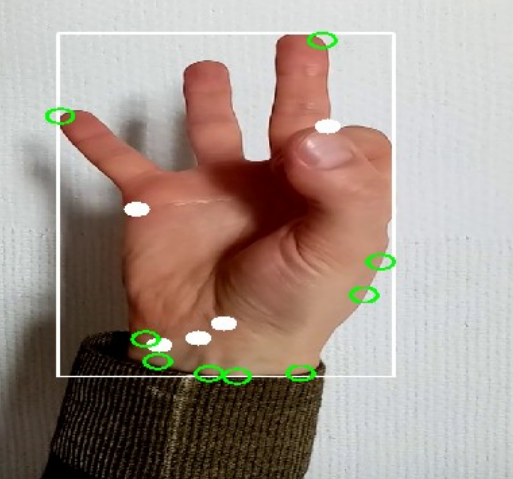

In [8]:
display(Image('./okey.png'))

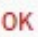

In [6]:
display(Image('./ok.png'))

Szczerze mówiąc 5 i 6 nie mam pojęcia jak zrobić w cpp/QT